<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

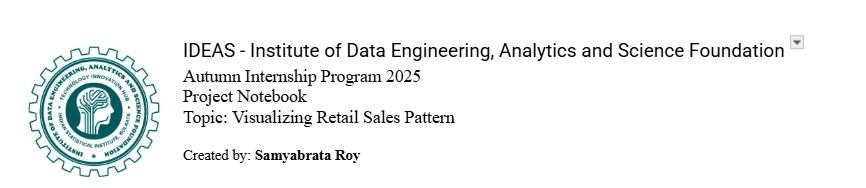

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*   
         

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime


---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kqDqFkMblqNBmt68clyn_CCNpdghgrE3"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?<br>
**Answer** -> Revenue in the month of May'23 went above 1,00,000 which is the highest and is followed by October'23,December'23 and February'23.

Q. What are your key takeaways?<br>
**Answer** -> As a store owner, the customers spent more in the months of February,May,October,December , which indicates the stock should be filled more in these months.



---

### ❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


In [ ]:
import matplotlib.dates as mdates
weekly_revenue = (
    df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount']
    .sum()
    .reset_index()
    )
weekly_revenue['Date'] = weekly_revenue['Date'].dt.to_timestamp()



# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue['Date'], weekly_revenue['Total Amount'], 
         marker='o', linewidth=2, color='tab:blue')

plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# ---- Bar Chart ----
plt.figure(figsize=(12,6))
plt.bar(weekly_revenue['Date'], weekly_revenue['Total Amount'], 
        width=5, color='skyblue', edgecolor='black')  # smaller width for weeks

plt.title("Weekly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



df_sales['Date'] = pd.to_datetime(df_sales['Date'])
weekly_revenue = (
    df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount']
    .sum()
    .reset_index()
)
weekly_revenue['Week Start'] = weekly_revenue['Date'].dt.start_time  # get week start

# ---- Line Chart ----
plt.figure(figsize=(12,6))
plt.plot(weekly_revenue['Week Start'], weekly_revenue['Total Amount'], 
         marker='o', linewidth=2, color='tab:blue')

plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Format X-axis to show week labels clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # show Mondays
plt.xticks(rotation=45)

plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(12,6))
plt.bar(weekly_revenue['Week Start'], weekly_revenue['Total Amount'], 
        width=5, color='skyblue', edgecolor='black')

plt.title("Weekly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
plt.xticks(rotation=45)

plt.show()



---


### Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

Answer -> Clothing (Product Catagory), did the highest contibution.



---


### ❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

In [ ]:
# Top 5 customers
# Did the customers did more than one payments?
print(len(df_sales["Customer ID"].unique()))
print(len(df_sales["Transaction ID"].unique()) == len(df_sales["Customer ID"].unique()))
# Hence, we can conclude the some costomers did more than one transaction
top_5_cus = df_sales.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False).head()
print(top_5_cus)


# Bar Chart 
plt.figure(figsize=(10,6))
plt.bar(top_5_cus.index, top_5_cus.values, 
        color="skyblue", edgecolor="black")

plt.title("Top 5 Customers by Total Spending", fontsize=14)
plt.xlabel("Customer", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

In [ ]:
avg_ord_val = df_sales.groupby("Customer ID")["Total Amount"].mean().sort_values(ascending = False).head(10)
print(avg_ord_val)

# Histogram  
plt.figure(figsize=(10,6))
plt.bar(avg_ord_val.index, avg_ord_val.values, color="lightblue")

plt.title("Average Order Value (AOV) per Customer", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Average Order Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Getting Someone who has  unusually high AOV by **proper method**

avg_ord_vals = df_sales.groupby("Customer ID")["Total Amount"].mean()
# Quartiles
Q1 = avg_ord_vals.quantile(.25)
Q3 = avg_ord_vals.quantile(.75)
IQR= Q3-Q1
# Upper bound 
upper_bound = Q3 + 1.5*IQR
# Outliers on the higher side of upper bound
unus_h_sp = avg_ord_vals[avg_ord_vals > upper_bound]
print(f"These are the people who spent unusually high = \n{unus_h_sp}")





---


### Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categotory has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?


-> Yes, since we want to compare the three, donut chart diplays the percentage contribution by all three catagories


Q. What else we could have come up with apart from donut chart to server the same purpose?
 

-> The best option after donut chart would be Pie chart.



---

## Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

In [ ]:
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()
weekly_revenue_cum = weekly_revenue.cumsum()  # cumulative sum

plt.figure(figsize=(10,6))
plt.plot(weekly_revenue_cum.index.to_timestamp(), weekly_revenue_cum.values, marker='o', color='green')
plt.title("Cumulative Weekly Revenue", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()



---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.


## 📖 Introduction about the dataset


## Coffee Sales
 Coffee sales in a vending machine



### Overview
This dataset contains detailed records of coffee sales from a vending machine.
The vending machine is the work of a dataset author who is committed to providing an open dataset to the community.
It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

### Data Collection Period
The dataset spans from March 2024 to Present time, capturing daily transaction data. And new information continues to be added.


### Author
Yaroslav Isaienkov @ihelon

--------

## About the columns

### The transactions are detailed by the following attributes:

**hour_of_day** – the hour when the transaction occurred

**cash_type** – payment method (e.g., cash, card)

**money** – transaction amount (in South African Rand)

**coffee_name** – type of beverage purchased

**Time_of_Day** – time category (Morning, Afternoon, Evening, etc.)

**Weekday** – day of the week (e.g., Mon, Tue, ...)

**Month_name** – month of the transaction

**Weekdaysort** – numerical order of the weekday

**Monthsort** – numerical order of the month

**Date** – transaction date

**Time** – exact transaction time

-------



In [ ]:
import pandas as pd

file_id = "1H8xbMp70Q10mmGwfm442kYGOfsPPBtuI"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df_2 = pd.read_csv(url)

In [ ]:
print(df_2.head())

In [ ]:
df_2.info()


In [ ]:
# Removing "R" from the money sections as it represents the  currency
df_2["money"] = df_2["money"].str.removeprefix("R")

In [ ]:
# Converting Data type of "date" into float values for calculations
df_2["money"] = df_2["money"].astype(float)
print(df_2["money"].dtypes)

In [ ]:
# Converting data typer of the date and datetime  columns
df_2["date"] = pd.to_datetime(df_2["date"],format='%d/%m/%Y')
print(df_2["date"])
df_2["datetime"] = pd.to_datetime(df_2["datetime"],format='%d/%m/%Y %H:%M:%S')
print("this is datetime:\n",df_2["datetime"])

In [ ]:
# Checking the total Time period
Start_Date = df_2["date"].sort_values(ascending = True).iloc[0]
End_Date = df_2["date"].sort_values(ascending=True).iloc[-1]
Total_period = End_Date - Start_Date
print(Total_period)

------
## Payment Methods



In [ ]:
# Checking payment methods
counts = df_2["cash_type"].value_counts()
print(counts)

## Pie plot
counts.plot.pie(autopct="%1.1f%%",
                 figsize=(5, 5), 
                 colors=["Orange", "green"]
                 )

plt.title("Card vs Cash Usage")
plt.ylabel("")  # Removes the extra ylabel
plt.show()

-------

## Monthly revenue 


In [ ]:
# Monthly revenue

monthly_revenue = df_2.groupby(df_2['date'].dt.to_period('M'))['money'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()


# Bar Chart 
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20 , color= "pink")  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


----

## Cumulative revenue 

In [ ]:
# Cumulative Revenue chart
weekly_revenue = df_2.groupby(df_2['date'].dt.to_period('W'))['money'].sum()
weekly_revenue_cum = weekly_revenue.cumsum()  # cumulative sum


# Line Chart
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue_cum.index.to_timestamp(), weekly_revenue_cum.values, marker='o', color='green')
plt.title("Cumulative Weekly Revenue", fontsize=14)
plt.xlabel("Week", fontsize=12)

plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

-----

## Top beverages

In [ ]:
sales = df_2.groupby(df_2["coffee_name"])["money"].sum()
print(sales)

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(sales.index, sales.values, 
        color="red", edgecolor="black")

plt.title("Coffee Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


------

## Busiest Week Days

In [ ]:
# Busiest Week days
per_w = df_2.groupby(df_2['Weekday'])["money"].sum()
print(per_w)

# Bar Chart
plt.figure(figsize=(10,6))
plt.bar(per_w.index, per_w.values, 
        color="green", edgecolor="black")
plt.title("Coffee Revenue", fontsize=14)
plt.xlabel("Week day", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

------

## Average money spent per coffee

In [ ]:
##average money spent per coffee type by time of day:
coffee_time_revenue = df_2.groupby(['coffee_name', 'Time_of_Day'])['money'].mean().unstack(fill_value=0)
print(coffee_time_revenue)

###heatmap creation:
plt.figure(figsize=(12, 8))
sns.heatmap(coffee_time_revenue, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Revenue'})
plt.title('Average Revenue per Coffee Type by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

--------

## Top 5 Customers

In [ ]:
# Top 5 customers 
cus_pay = df_2.groupby(df_2["card"])["money"].sum().sort_values(ascending=False).head(5)
print(f"These are the payments by the customers :\n{cus_pay}")

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(cus_pay.index,cus_pay.values)
plt.title("Customerd ")
plt.xticks(rotation = 45)
plt.show()

-----------

## Conclusions


•  Digital payments dominate, making up 97.6% of all sales.<br>
•  October 2024 saw the highest revenue; January 2025 the lowest.<br>
•  Cumulative revenue shows steady long-term growth.<br>
•  Latte and Americano with Milk are top-selling beverages.<br>
•  A small group of customers drive majority of spending.<br>
•  Beverage preference shifts throughout the day.<br>
•  Hot Chocolate leads revenue in average.<br>


## Thank You

------
------